##  Sum of bias-variance tradeoffs
This notebook contains the relevant code for the risk of the linear ridge regression model

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 20})
import numpy as np

save_outputs = False

In [2]:
def risk(theta,sigma,lams,sigma_noise,n):
    out = np.array( [ np.sum( [sigma**2 * theta**2 * (lam/(lam+sigma**2))**(2)] )  for lam in lams ] )
    out += np.array( [ np.sum( [(sigma_noise**2/n) * sigma**2 * (sigma/(lam+sigma**2))**2] )  for lam in lams ] )
    out += sigma_noise**2
    return out


def savemtx_for_logplot(filename = "linear.txt", **A):
    
    file_head = ' '.join([k for k in A.keys()])
    file_mat = np.column_stack([np.array(v) for v in A.values()])
    
    np.savetxt(filename, 
               file_mat, 
#                fmt='%.3f', 
               header=file_head, 
               comments='',
               newline='\n' )
    
    print('DONE!')
    print('Saved at {}'.format(filename))

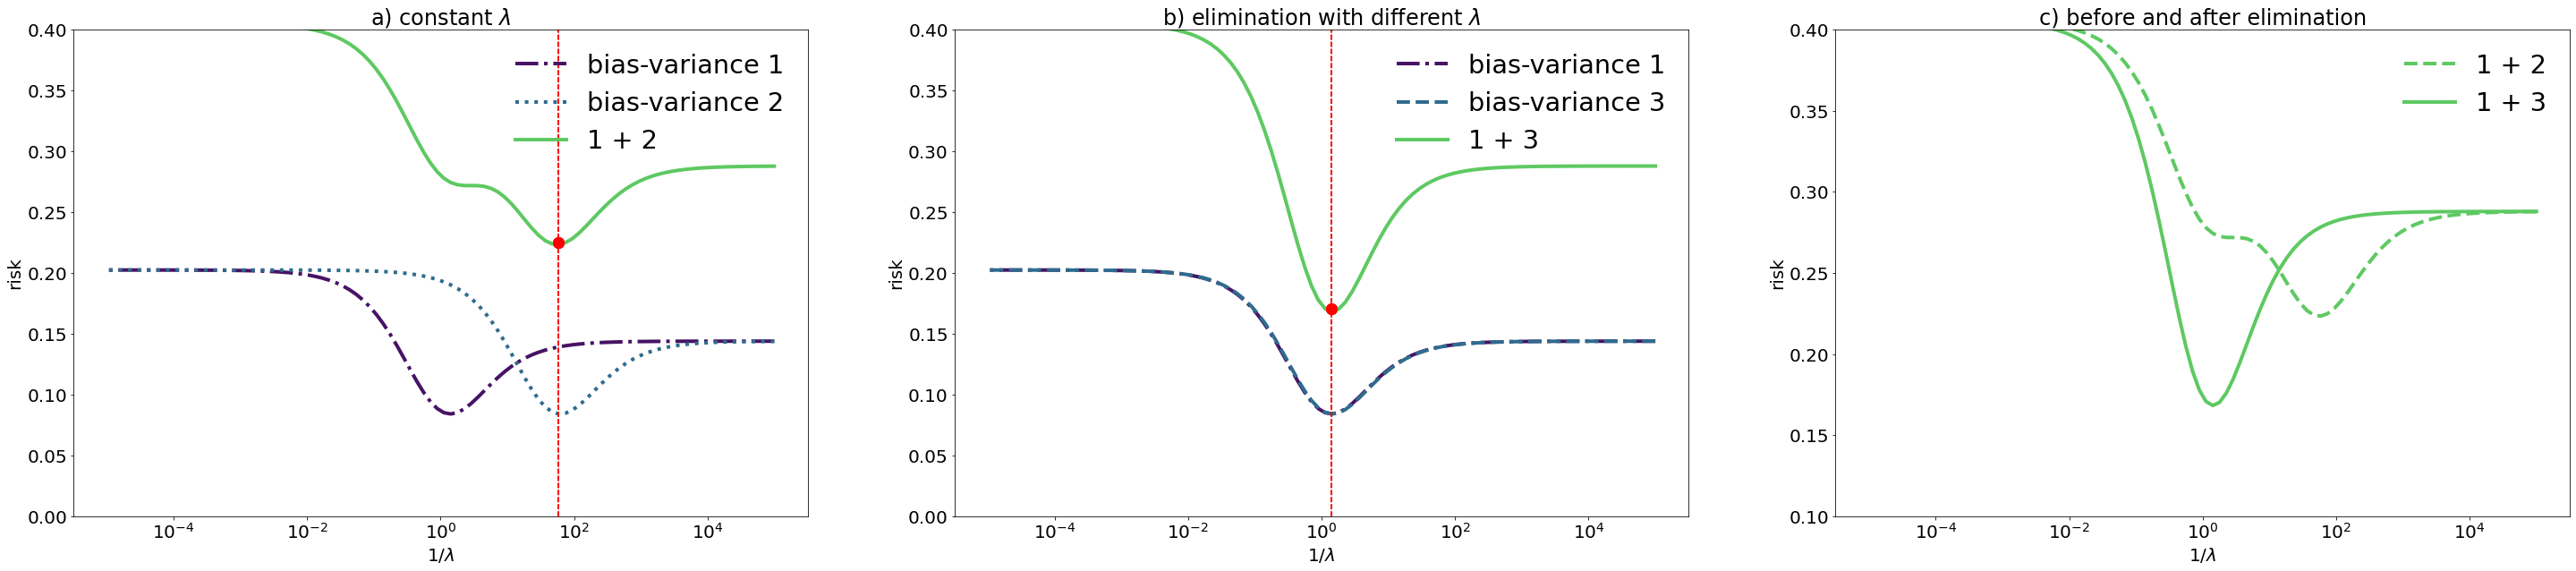

In [3]:
sigma_noise = 1.2
lam_range = [-5, 5]
lams = np.logspace(*lam_range, 100)
dm = 1
n = 10

s1 = 1.0
t1 = 1.5

s2 = 0.15
t2 = 10.0

sigma1 = np.array([s1]*dm)
theta1 = np.array([t1]*dm)*0.3
sigma2 = np.array([s2]*dm)
theta2 = np.array([t2]*dm)*0.3

risk1 = risk(theta1, sigma1, lams, sigma_noise, n)
risk2 = risk(theta2, sigma2, lams, sigma_noise, n)
risk22 = risk(theta2, sigma2, lams/43, sigma_noise, n)

risk_total = risk1 + risk2
risk_total2 = risk1 + risk22


cmap = matplotlib.cm.get_cmap('viridis')
colorList = [cmap(50/1000), cmap(350/1000), cmap(750/1000)]
lsList = ['dashdot', 'dotted', 'solid']
lsList2 = ['dashdot', 'dashed', 'solid']
labelList = ['bias-variance 1', 'bias-variance 2', '1 + 2']
labelList2 = ['bias-variance 1', 'bias-variance 3', '1 + 3']

fig = plt.figure(figsize=(50,10))
ax = plt.subplot(131)
ax.set_xscale('log')
cur_min = lams[np.argmin(risk_total)]
for i, cur_ve in enumerate([r-n for r, n in 
            zip([risk1, risk2, risk_total], 
                [sigma_noise**2, sigma_noise**2, 2*sigma_noise**2])]):
    ax.plot(1/lams, cur_ve, 
            color=colorList[i], 
            label=labelList[i],
            linestyle=lsList[i], 
            lw=4)
    ax.axvline(1/cur_min, color='red', linestyle='dashed')
    ax.plot(1/cur_min, (risk_total - 2*sigma_noise**2)[np.argmin(risk_total)-1], 'ro', 
             markersize=12) 
ax2 = plt.subplot(132)
ax2.set_xscale('log')
cur_min = lams[np.argmin(risk_total2)]
for i, cur_ve in enumerate([r-n for r, n in 
            zip([risk1, risk22, risk_total2], 
                [sigma_noise**2, sigma_noise**2, 2*sigma_noise**2])]):
    ax2.plot(1/lams, cur_ve, 
            color=colorList[i], 
            label=labelList2[i],
            linestyle=lsList2[i], 
            lw=4)
    ax2.axvline(1/cur_min, color='red', linestyle='dashed')
    ax2.plot(1/cur_min, (risk_total2 - 2*sigma_noise**2)[np.argmin(risk_total2)-1], 'ro', 
             markersize=12) 
    
ax3 = plt.subplot(133)
ax3.set_xscale('log')
cur_min = lams[np.argmin(risk_total2)]
risk_curves = [r-n for r, n in zip([risk_total, risk_total2], [2*sigma_noise**2, 2*sigma_noise**2])]
ax3.plot(1/lams, 
         risk_curves[0],
         color=colorList[2],
         label=labelList[2],
         linestyle=lsList2[1], 
         lw=4)
ax3.plot(1/lams, 
         risk_curves[1],
         color=colorList[2],
         label=labelList2[2],
         linestyle=lsList2[2], 
         lw=4)

    
    
axList = [ax, ax2, ax3]
for cur_ax in axList: cur_ax.legend(loc=1, bbox_to_anchor=(1, 1), fontsize='x-large',
    frameon=False, fancybox=True, shadow=True, ncol=1)
for cur_ax in axList: cur_ax.set_ylim([0, 0.4])
for cur_ax in axList: cur_ax.set_ylabel('risk')
for cur_ax in axList: cur_ax.set_xlabel(r'$1/\lambda$')
ax.set_title(r'a) constant $\lambda$')
ax2.set_title(r'b) elimination with different $\lambda$')
ax3.set_title(r'c) before and after elimination')
ax3.set_ylim([0.10, 0.40])
plt.show()

if save_outputs:
#     mtx = np.array([risk1-sigma_noise**2, risk2-sigma_noise**2, risk22-sigma_noise**2, risk_total - 2*sigma_noise**2, risk_total2 - 2*sigma_noise**2 ] )
    mtx = {'lambda': lams,
           'risk1': risk1-sigma_noise**2, 
           'risk2': risk2-sigma_noise**2, 
           'new_risk2': risk22-sigma_noise**2, 
           'risk_total': risk_total - 2*sigma_noise**2, 
           'risk_total2': risk_total2 - 2*sigma_noise**2}
    savemtx_for_pgf( "linear_risk_reconciled.dat", **mtx ) 